In [28]:
import matplotlib.pyplot as plt
import sklearn.datasets as skdata
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score
%matplotlib inline

In [2]:
numeros = skdata.load_digits()
target = numeros['target']
imagenes = numeros['images']
n_imagenes = len(target)
print(np.shape(imagenes), n_imagenes) # Hay 1797 digitos representados en imagenes 8x8

(1797, 8, 8) 1797


[[ 0.  0.  3. 13. 11.  7.  0.  0.]
 [ 0.  0. 11. 16. 16. 16.  2.  0.]
 [ 0.  4. 16.  9.  1. 14.  2.  0.]
 [ 0.  4. 16.  0.  0. 16.  2.  0.]
 [ 0.  0. 16.  1.  0. 12.  8.  0.]
 [ 0.  0. 15.  9.  0. 13.  6.  0.]
 [ 0.  0.  9. 14.  9. 14.  1.  0.]
 [ 0.  0.  2. 12. 13.  4.  0.  0.]]


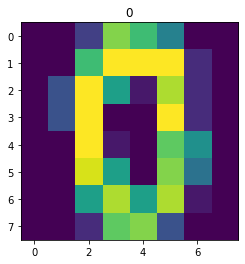

In [3]:
i=20 # este es uno de esos digitos
_ = plt.imshow(imagenes[i])
plt.title('{}'.format(target[i]))
print(imagenes[i])

[[ 0.  0.  3. 13. 11.  7.  0.  0.]
 [ 0.  0. 11. 16. 16. 16.  2.  0.]
 [ 0.  4. 16.  9.  1. 14.  2.  0.]
 [ 0.  4. 16.  0.  0. 16.  2.  0.]
 [ 0.  0. 16.  1.  0. 12.  8.  0.]
 [ 0.  0. 15.  9.  0. 13.  6.  0.]
 [ 0.  0.  9. 14.  9. 14.  1.  0.]
 [ 0.  0.  2. 12. 13.  4.  0.  0.]]


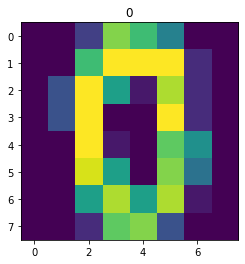

In [4]:
i=20 # este es uno de esos digitos
_ = plt.imshow(imagenes[i])
plt.title('{}'.format(target[i]))
print(imagenes[i])

In [5]:
# para poder correr PCA debemos "aplanar las imagenes"
data = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
print(np.shape(data))

(1797, 64)


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=0.5, test_size=0.5)

In [8]:
# Vamos a entrenar solamente con los digitos iguales a 1
def pca_imgs(x,y,numero = 1):
    dd = y_train==numero
    cov = np.cov(x_train[dd].T)
    valores, vectores = np.linalg.eig(cov)
    valores = np.real(valores)
    vectores = np.real(vectores)
    ii = np.argsort(-valores)
    valores = valores[ii]
    vectores = vectores[:,ii]

    plt.figure(figsize=(15,5))
    plt.subplot(2,3,1)
    plt.title("Matriz de Covarianza")
    plt.imshow(cov)

    plt.subplot(2,3,2)
    plt.title("Varianza explicada")
    plt.plot(np.cumsum(valores)/np.sum(valores))
    plt.xlabel("Componentes")
    plt.ylabel("Fraccion")
    max_comps = (np.count_nonzero((np.cumsum(valores)/np.sum(valores))<0.6))
    print(max_comps+1) # Necesito este numero de componentes para tener al menos el 60 de la varianza.

    plt.subplot(2,3,4)
    plt.imshow(vectores[:,0].reshape(8,8))
    plt.title('Primer Eigenvector')
    plt.subplot(2,3,5)
    plt.title('Segundo Eigenvector')
    plt.imshow(vectores[:,1].reshape(8,8))
    plt.subplot(2,3,6)
    plt.title('Tercer Eigenvector')
    plt.imshow(vectores[:,2].reshape(8,8))
    plt.subplots_adjust(hspace=0.5)
    return valores, vectores

3


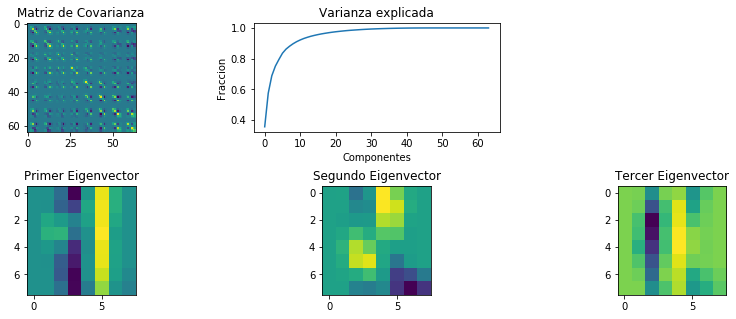

In [56]:
valores_train, vectores_train=pca_imgs(x_train,y_train,numero = 1)

3
(64, 64)
(64,)
(64,)


15.0

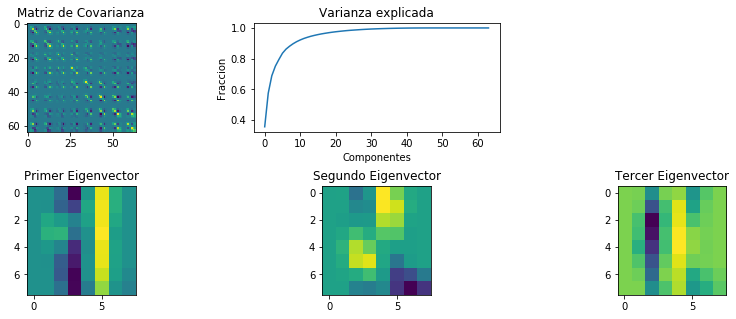

In [55]:
#vectores_train
print(np.shape(vectores_train))
print(np.shape(x_test[0]))
#plt.imshow(x_test[:,0])
#print(np.shape(imagenes[i]))
print(np.shape(x_train[0]))
np.dot(x_train[0],vectores_train[0])

In [54]:
#y_true = [0, 1, 2, 0, 1, 2]
#y_pred = [0, 2, 1, 0, 0, 1]
#print(f1_score(y_true, y_pred, average='macro'))
#print(f1_score(y_true, y_pred, average='micro'))
#print(f1_score(y_true, y_pred, average='weighted'))
#print(f1_score(y_true, y_pred, average=None))
#y_true = [0, 0, 0, 0, 0, 0]
#y_pred = [0, 0, 0, 0, 0, 0]
#f1_score(y_true, y_pred, zero_division=1)
print(f1_score(x_train[0], x_test[0], average='weighted'))

0.3934426229508197


/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/john/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [10]:
#test
eps=0.0001
f_neg=0
t_pos=0
f_pos=0
t_neg=0
dot_prod=np.zeros(len(vectores_train))
for i in range(len(vectores_train)):
    dot_prod[i]=np.dot(vectores_train[i],vectores_test[i])
    if (np.abs(dot_prod[i])<eps):
        #print("False negative")
        f_neg+=1
    else:
        #print("True positive")
        t_pos+=1
def cobertura(f_neg,t_pos):
    return t_pos/(t_pos+f_neg)
def precision(f_pos,t_pos):
    return t_pos/(t_pos+f_pos)
cobertura(f_neg,t_pos)

1.0

In [22]:
#sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=True, tol=0.0001)
clf = LinearDiscriminantAnalysis()
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf.fit(X, y)
print(clf.predict([[-0.8, -1]]))
clf.decision_function(X)

[1]


array([ -8.,  -8., -16.,   8.,   8.,  16.])

In [11]:
def f1(f_pos,f_neg,t_pos,t_neg):
    return 2*precision(f_pos,t_pos)*cobertura(f_neg,t_pos)/(precision(f_pos,t_pos)+cobertura(f_neg,t_pos))

In [ ]:
matriz=[[t_pos,f_neg],[f_pos,t_neg]]
plt.imshow(matriz)
plt.savefig("matriz.png")